In [39]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import seaborn as sns; sns.set()
from time import time

from scipy.stats import spearmanr as spear

In [40]:
class GeneEntry():
    """ Fetches and returns average values for selected gene_name
    """
    def __init__(self, gene_name, dataset, sd=False):
        self.dataset = dataset
        self.gene_name = gene_name
        self.sd = sd
        
        self.cond = {
            "wt_cd_6"   : ['bl6_3_F_6_bl6_chow', 'bl6_26_M_6_bl6_chow', 'bl6_27_M_6_bl6_chow'],
            "wt_wd_6"   : ['bl6_12_F_6_bl6_WD', 'bl6_29_M_6_bl6_WD', 'bl6_30_M_6_bl6_WD'],
            "eko_cd_6"  : ['eko_6_F_6_eko_chow', 'eko_50_M_6_eko_chow', 'eko_51_M_6_eko_chow'],
            "eko_wd_6"  : ['eko_1_F_6_eko_WD', 'eko_47_M_6_eko_WD', 'eko_48_M_6_eko_WD'],
            
            "EKOp_cd_6" : ['X73.70.6_M_6_p_chow', 'X73.72.6_M_6_p_chow'],
            "EKOp_wd_6" : ['X73.47.5_M_6_p_WD', 'X73.60.2_F_6_p_WD', 'X73.60.4_M_6_p_WD'],
            
            "wt_cd_22"  : ['bl6_8_F_22_bl6_chow', 'bl6_23_M_22_bl6_chow', 'bl6_24_M_22_bl6_chow'],
            "wt_wd_22"  : ['bl6_17_F_22_bl6_WD', 'bl6_34_M_22_bl6_WD', 'bl6_35_M_22_bl6_WD'],
            "eko_cd_22" : ['eko_15_F_22_eko_chow', 'eko_16_F_22_eko_chow', 'eko_42_M_22_eko_chow'],
            "eko_wd_22" : ['eko_21_F_22_eko_WD', 'eko_29_M_22_eko_WD', 'eko_33_M_22_eko_WD'],
            
            "EKOp_cd_22": ['X73.57.1_M_22_p_chow', 'X73.58.6_F_22_p_chow', 'X73.58.8_M_22_p_chow'],
            "EKOp_wd_22": ['X73.32.2_F_22_p_WD', 'X73.32.7_M_22_p_WD', 'X73.49.4_M_22_p_WD'],
        }
        
        self.cols = []
        for x in self.cond.values():
            self.cols.extend(x)
        
        # hardwiring the AVERAGE for each group
        # example: self.eko_cd_22 = 34.5
        for group, cols in self.cond.items():
            setattr(self, group, np.average(dataset.loc[gene_name][cols]))
        
        # packing values into a mini-dataframe, more efficient/handy
        self.df = pd.DataFrame(dataset.loc[gene_name, self.cols])
        
        cond_names = []
        for k,v in self.cond.items():
            for _ in range(len(v)):
                cond_names.append(k)
        
        self.df["group"] = cond_names

In [41]:
dfull_path = "/Users/manz/Dropbox/manz @lab3/Esperimenti/Illumina 73 (Trascrittomica aorte BL6, EKO, 73+, 73-) (2011 - 2013)/Risultati Finali - Take IV - 010419/trascrittomicatopi/tabellone_finale_tutti_res_pvalues.xls"
dfull = pd.read_excel(dfull_path)

In [42]:
# This loads the dataset
dfull = dfull.iloc[:,:48]
cols_to_keep = [x for x in dfull.columns if "_m_" not in x]
dfull = dfull.loc[:, cols_to_keep]

In [43]:
dfull.shape

(14174, 35)

In [80]:
# =================================================
#   Plaque extent to gene expression correlations
# =================================================

import warnings
warnings.filterwarnings("error") # preventing zeroes from messing stuff

if True:

    # Looking for genes whose expression follows plaque extent.
    # Labels are attached to plaque extent, which is divided into tiers
    
    conds = [
        'wt_cd_6', 'wt_wd_6', 'eko_cd_6', 
        'eko_wd_6', 'EKOp_cd_6', 'EKOp_wd_6', 
        'wt_cd_22', 'wt_wd_22', 'eko_cd_22', 
        'eko_wd_22', 'EKOp_cd_22', 'EKOp_wd_22'
    ]
    
    # these are the labels
    gravity = {
        "wt_cd_6": 0,
        "EKOp_cd_6": 0,
        "eko_cd_6": 0,
        "wt_cd_22": 0,
        "EKOp_cd_22": 0,
        "wt_wd_6": 0,
        "wt_wd_22": 0,
        
        "eko_cd_22": 1,
        "EKOp_wd_6": 1,
        "eko_wd_6": 1,
        
        "EKOp_wd_22": 2,
        
        "eko_wd_22" :4,
    }
    
    t0 = time()
    rhos = []
    pvals = []    

    for i, gene_name in enumerate(dfull.index):
        
        print(f"Gene {i}: \t{gene_name}                ", end="\r")
        
        g = GeneEntry(gene_name, dfull)
        
        x = [getattr(g, key) for key in conds]
        y = [gravity.get(key) for key in conds]
        
        try:
            rho, pval = spear(x, y)
            rhos.append(rho)
            pvals.append(pval)
        except:
            rhos.append(0)
            pvals.append(1)
    
    t1 = time()
    timetook = t1-t0
    print(f"{round(timetook, 2)} seconds {round(timetook/60, 2)} minutes.")

325.7 seconds 5.43 minutes.                   


In [81]:
# generates: <randrhos> <randpvals>
# =================================================
#   RANDOM labels to gene expression correlations
# =================================================

import warnings
warnings.filterwarnings("error")
from random import shuffle

TESTS = 100

for i in range(TESTS):
    print(f"Calculating random gene expression/plaque scores: {i}")
    
    rho_label = f"randrhos_{i}"
    pval_label = f"randpval_{i}"
    
    conds = [
        'wt_cd_6', 'wt_wd_6', 'eko_cd_6', 
        'eko_wd_6', 'EKOp_cd_6', 'EKOp_wd_6', 
        'wt_cd_22', 'wt_wd_22', 'eko_cd_22', 
        'eko_wd_22', 'EKOp_cd_22', 'EKOp_wd_22'
    ]
   
    t0 = time()
    randrhos = []
    randpvals = []    

    for i, gene_name in enumerate(dfull.index):
        # =====================
        numbers = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 4]
        shuffle(numbers)
        gravity = {x:y for x,y in zip(conds, numbers)}
        # =====================
        
        print(f"Gene {i}: \t{gene_name}                ", end="\r")
        
        g = GeneEntry(gene_name, dfull)
        
        x = [getattr(g, key) for key in conds]
        y = [gravity.get(key) for key in conds]
        
        try:
            rho, pval = spear(x, y)
            randrhos.append(rho)
            randpvals.append(pval)
        except:
            randrhos.append(0)
            randpvals.append(1)
    
    t1 = time()
    timetook = t1-t0
    print(f"{round(timetook, 1)} seconds: {round(timetook/60, 1)} minutes.")
    
    # adding values to dfull
    dfull[rho_label] = randrhos
    dfull[pval_label] = randpvals

dfull.to_csv("one_hundred_random_analyses.csv", sep="\t")

Calculating random gene expression/plaque scores: 0
313.3 seconds: 5.2 minutes.                   
Calculating random gene expression/plaque scores: 1
311.3 seconds: 5.2 minutes.                   
Calculating random gene expression/plaque scores: 2
320.1 seconds: 5.3 minutes.                   
Calculating random gene expression/plaque scores: 3
304.9 seconds: 5.1 minutes.                   
Calculating random gene expression/plaque scores: 4
331.4 seconds: 5.5 minutes.                   
Calculating random gene expression/plaque scores: 5
354.6 seconds: 5.9 minutes.                   
Calculating random gene expression/plaque scores: 6
349.0 seconds: 5.8 minutes.                   
Calculating random gene expression/plaque scores: 7
333.8 seconds: 5.6 minutes.                   
Calculating random gene expression/plaque scores: 8
323.1 seconds: 5.4 minutes.                   
Calculating random gene expression/plaque scores: 9
313.5 seconds: 5.2 minutes.                   
Calculatin

3185.7 seconds: 53.1 minutes.                 
Calculating random gene expression/plaque scores: 83
499.5 seconds: 8.3 minutes.                   
Calculating random gene expression/plaque scores: 84
311.8 seconds: 5.2 minutes.                   
Calculating random gene expression/plaque scores: 85
290.7 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 86
289.6 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 87
287.6 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 88
289.1 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 89
290.3 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 90
289.2 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 91
289.0 seconds: 4.8 minutes.                   
Calculating random gene expression/plaque scores: 92


In [44]:
dfull = pd.read_csv("one_hundred_random_analyses.csv", sep="\t")

In [45]:
wanted = [x for x in dfull.columns if "randpval_" in x]

In [46]:
df = dfull[wanted]

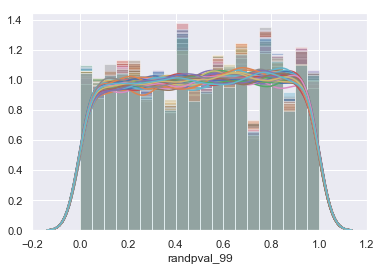

In [47]:
for col in df.columns:
    sns.distplot(df[col], bins=20)

In [48]:
df_ = pd.read_csv("results and patterns.csv")

Text(0, 0.5, 'Norm counts (1=same in each interval)')

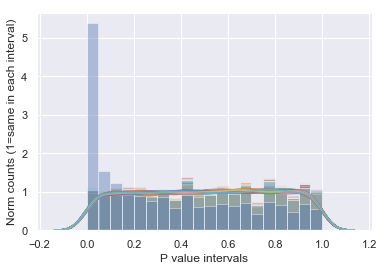

In [49]:
for col in df.columns:
    sns.distplot(df[col], bins=20)

sns.distplot(df_["pvals"], bins=20, kde_kws={"linewidth":0})

plt.xlabel("P value intervals")
plt.ylabel("Norm counts (1=same in each interval)")